In [243]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# import pandas_profiling as pp
# print(pp.__version__)

In [244]:
train_data = pd.read_csv("data/train_data_v2.csv")
test_data = pd.read_csv("data/test_data_v2.csv")
train_data.shape, test_data.shape

((14731, 22), (6599, 21))

In [245]:
# profile = pp.ProfileReport(train_data)
# profile.to_file("profiling_train_data.html")

In [246]:
# profile_2 = pp.ProfileReport(test_data)
# profile_2.to_file("profiling_test_data.html")

In [247]:
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [248]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [249]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


In [250]:
train_data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [251]:
# train_data.replace({"Nan": np.NaN}, inplace=True)
# train_data.head()

## Split "train_data" into "training set" and "testing set".  

`Note: The file "test_data_v2.csv" contains test data for competition ranking. This is not to be confused with the "testing set" created form "training_data_v2.csv" above.`  

In [252]:
X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X.shape, y.shape

((14731, 21), (14731,))

In [253]:
X.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

In [254]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Made_Purchase, dtype: bool

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape,  y_test.shape

((11784, 21), (2947, 21), (11784,), (2947,))

## Visualization  

In [256]:
exploration_set = train_data.copy()
exploration_set.shape

(14731, 22)

<AxesSubplot:xlabel='HomePage', ylabel='HomePage_Duration'>

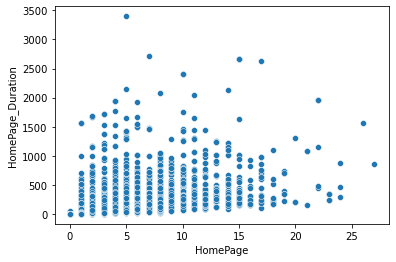

In [257]:
sns.scatterplot(x='HomePage', y='HomePage_Duration', data=exploration_set)

<AxesSubplot:xlabel='GoogleMetric:Bounce Rates', ylabel='GoogleMetric:Exit Rates'>

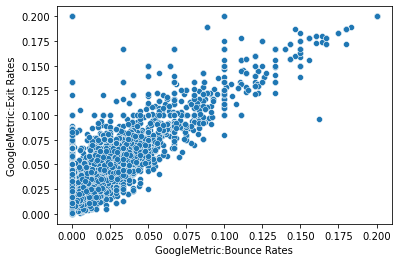

In [258]:
sns.scatterplot(x='GoogleMetric:Bounce Rates', y='GoogleMetric:Exit Rates', data=exploration_set)

<AxesSubplot:xlabel='ProductDescriptionPage', ylabel='ProductDescriptionPage_Duration'>

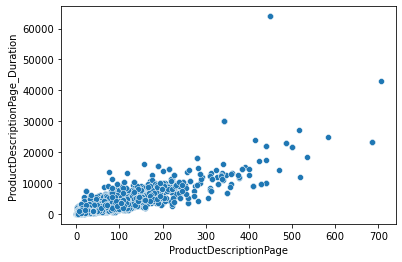

In [259]:
sns.scatterplot(x='ProductDescriptionPage', y='ProductDescriptionPage_Duration', data=exploration_set)

In [260]:
corr_matrix = exploration_set.corr()

In [261]:
corr_matrix['HomePage']

HomePage                           1.000000e+00
HomePage_Duration                  5.965807e-01
LandingPage                        3.709664e-01
LandingPage_Duration               2.608868e-01
ProductDescriptionPage             4.387566e-01
ProductDescriptionPage_Duration    3.720836e-01
GoogleMetric:Bounce Rates         -2.262110e-01
GoogleMetric:Exit Rates           -3.189946e-01
GoogleMetric:Page Values           1.079271e-01
SeasonalPurchase                  -8.392428e-02
OS                                -4.994352e-03
SearchEngine                      -2.331256e-02
Zone                              -7.702525e-07
Type of Traffic                   -3.759046e-02
WeekendPurchase                    2.579618e-02
Made_Purchase                      5.223521e-02
Name: HomePage, dtype: float64

In [262]:
corr_matrix['GoogleMetric:Bounce Rates']

HomePage                          -0.226211
HomePage_Duration                 -0.144184
LandingPage                       -0.119836
LandingPage_Duration              -0.075672
ProductDescriptionPage            -0.208012
ProductDescriptionPage_Duration   -0.180863
GoogleMetric:Bounce Rates          1.000000
GoogleMetric:Exit Rates            0.917069
GoogleMetric:Page Values          -0.109711
SeasonalPurchase                   0.069349
OS                                 0.018894
SearchEngine                      -0.017315
Zone                              -0.008234
Type of Traffic                    0.080653
WeekendPurchase                   -0.044102
Made_Purchase                     -0.053724
Name: GoogleMetric:Bounce Rates, dtype: float64

<AxesSubplot:>

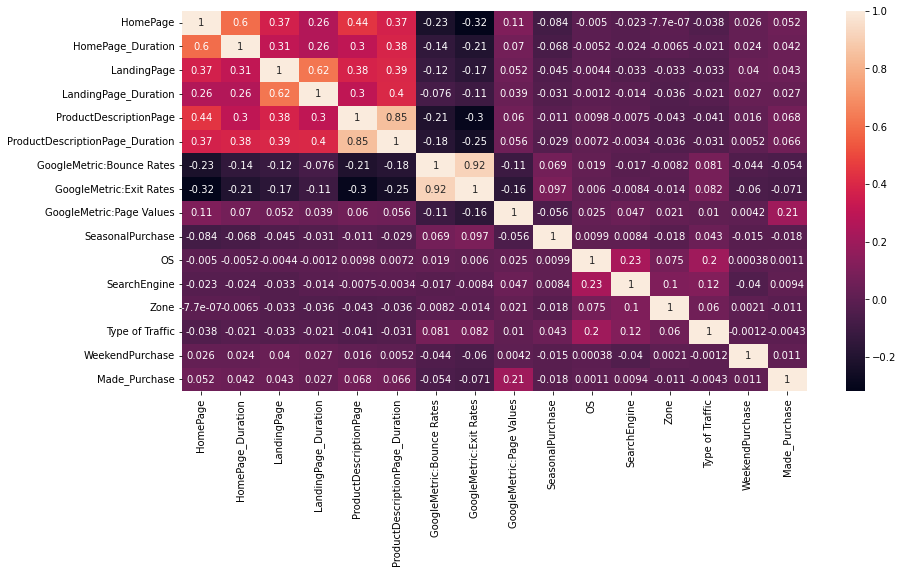

In [263]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

## Data cleaning  

`Current strategy is to keep missing values as NaN.`  
<br>
`We are not dropping the corresponding rows (because test file also has missing values) or imputing missing values (because we do not know the nature/reason of the missng values)`  

In [264]:
X_train.isna().sum()

HomePage                           114
HomePage_Duration                  114
LandingPage                        118
LandingPage_Duration               112
ProductDescriptionPage              98
ProductDescriptionPage_Duration    135
GoogleMetric:Bounce Rates          133
GoogleMetric:Exit Rates            108
GoogleMetric:Page Values            97
SeasonalPurchase                   119
Month_SeasonalPurchase             115
OS                                 101
SearchEngine                        98
Zone                                94
Type of Traffic                    118
CustomerType                       114
Gender                             120
Cookies Setting                    114
Education                          110
Marital Status                     102
WeekendPurchase                     98
dtype: int64

In [265]:
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

### Variable types  

In [266]:
train_data["Made_Purchase"].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [267]:
# Categorical variables  

cat_vars = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase']

print(len(cat_vars))

11


In [268]:
# Numerical variables  

num_vars = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase']

print(len(num_vars))

10


In [277]:
cat_pipeline = Pipeline([
                        ('ohe', OneHotEncoder())
                        ])

num_pipeline = Pipeline([
                        ('si', SimpleImputer(strategy="median")),
                        ('ss', StandardScaler())
                        ])

In [278]:
ct1 = ColumnTransformer([
                        ('num', num_pipeline, num_vars),
                        ('cat', OneHotEncoder(), cat_vars),
                        ], sparse_threshold=0)
df1 = ct1.fit_transform(X_train)
df1 = pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-0.680905,-0.439227,-0.386170,-0.235242,0.111253,-0.356615,1.050255,1.124111,-0.285119,3.596599,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.377227,-0.439227,-0.386170,-0.235242,-0.481889,-0.385408,-0.465332,-0.158030,-0.285119,-0.316910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.141164,0.141326,2.012261,0.449539,1.457227,0.638926,-0.465332,-0.679855,0.714428,-0.316910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.141164,0.064950,-0.386170,-0.235242,-0.595954,-0.547727,-0.465332,-0.492738,-0.285119,-0.316910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.659555,0.053565,0.413307,-0.235242,-0.299384,1.059274,-0.465332,-0.535668,0.631062,-0.316910,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11779,2.355877,0.391062,-0.386170,-0.235242,-0.139692,-0.243897,0.309922,-0.104045,-0.285119,-0.316910,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11780,0.230130,-0.226404,-0.386170,-0.235242,-0.595954,-0.559407,-0.465332,-0.643356,-0.285119,-0.316910,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11781,0.533808,-0.020458,-0.386170,-0.235242,-0.550328,-0.546555,-0.465332,-0.671248,-0.285119,-0.316910,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11782,-0.680905,-0.439227,-0.386170,-0.235242,-0.641580,-0.564627,-0.465332,0.444444,-0.285119,-0.316910,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [279]:
## A simple logistic regression model  

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [281]:
pipe = Pipeline([
                ("transformer", ct1),
                ("model", log_reg)
                ])
pipe.fit(X_train, y_train)

/home/ganesh/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['HomePage',
                                                   'HomePage_Duration',
                                                   'LandingPage',
                                                   'LandingPage_Duration',
                                                   'ProductDescriptionPage',
                                                   'ProductDescriptionPage_Duration',
                                                   'GoogleMetric:Bounce Rates',
 

In [284]:
# Test log_reg model  

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_train = pipe.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.65      0.95      0.77      7180
        True       0.71      0.19      0.30      4604

    accuracy                           0.65     11784
   macro avg       0.68      0.57      0.54     11784
weighted avg       0.67      0.65      0.59     11784



In [285]:
y_pred_test = pipe.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.68      0.95      0.79      1885
        True       0.71      0.20      0.32      1062

    accuracy                           0.68      2947
   macro avg       0.69      0.58      0.56      2947
weighted avg       0.69      0.68      0.62      2947

